# Import Packages

In [1]:
import seaborn as sns
from sklearn.utils import shuffle
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import Dataset

In [2]:
Diamonds = pd.read_csv('C:/Users/mrice/OneDrive/Documents/Diamonds/Diamonds.csv')

# Dummy Code

In [3]:
Diamonds1 = pd.get_dummies(Diamonds[['cut', 'color', 'clarity']])

In [4]:
Diamonds2 = pd.concat([Diamonds, Diamonds1], axis = 1)

# Data Wrangling

In [5]:
Columns=[Diamonds2.columns[1]] + Diamonds2.columns[19:38].tolist()

In [6]:
x = [Diamonds2[Columns]]

In [7]:
Diamonds3 = pd.DataFrame(x[0], columns = Columns)

In [8]:
y = Diamonds2[['price']]

In [9]:
type(Diamonds3)

pandas.core.frame.DataFrame

# Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(Diamonds3,y, test_size = .4)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 13) (32364, 1)
(21576, 13) (21576, 1)


# Linear Regression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(x_train, y_train)

LinearRegression()

# Examine Predictions

In [14]:
predictions = lm.predict(x_test)
predictions

array([[ 1338.7541242 ],
       [ 8050.10992645],
       [ 4962.55807427],
       ...,
       [ 6809.91549549],
       [  794.06317862],
       [14997.8350506 ]])

# Scatterplot

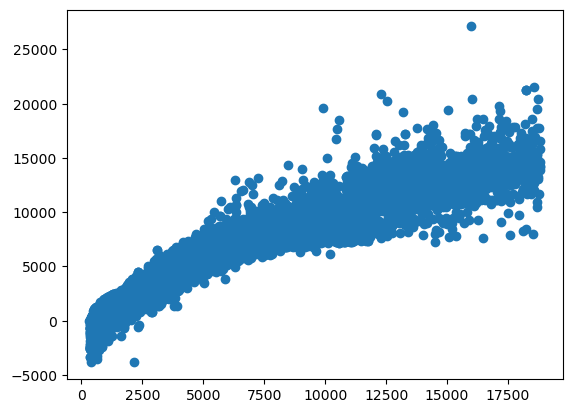

In [15]:
plt.scatter(y_test, predictions)

# Accuracy Score

In [16]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9162694174974705


## Mean Absolute Error (MAE)

In [17]:
metrics.mean_absolute_error(y_test, predictions)

808.2604431819371


## Mean Squared Error (MSE)

In [18]:
metrics.mean_squared_error(y_test, predictions)

1354599.1534123532

## Root Mean Squared Error

In [19]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1163.872481594248

# k-Fold Cross Validation

In [30]:
kfold = KFold(n_splits = 5, shuffle = True)
for train, test in kfold.split(Diamonds3,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     2     3 ... 53937 53938 53939], test: [    1     4     5 ... 53924 53934 53936]
train: [    0     1     3 ... 53935 53936 53937], test: [    2    10    11 ... 53928 53938 53939]
train: [    0     1     2 ... 53936 53938 53939], test: [    8    12    17 ... 53919 53931 53937]
train: [    0     1     2 ... 53937 53938 53939], test: [   14    15    16 ... 53910 53929 53932]
train: [    1     2     4 ... 53937 53938 53939], test: [    0     3     6 ... 53930 53933 53935]


In [32]:
print(cross_val_score(lm, Diamonds3,y, cv=5))

[  0.12348412   0.69054905   0.81906807 -13.0620158   -1.18462601]
